<a href="https://colab.research.google.com/github/diegoax/ALNAE-2025/blob/main/clase2_ALNAE_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Álgebra Lineal Numérica con Julia

(es importante que este jupyter notebook corra en Julia. Para eso deeplegar la pestaña "Connect" y elegir para cambiar el runtime a Julia)

Este notebook explora los conceptos fundamentales de la multiplicación de matrices y espacios columna en álgebra lineal.
Se utilizan ejemplos prácticos en Julia para reforzar los conceptos clave.

Los ejercicios que comiencen con $(\dagger)$ tienen cierta dificultad.

---

## Multiplicación de Matrices $Ax$ Usando Columnas de $A$
La multiplicación de una matriz $A$ por un vector $x$ se puede hacer de dos maneras:
1. Utilizando las filas de $A$ y calculando productos internos.
2. Utilizando las columnas de $A$ y combinaciones lineales.

La matriz $A$ y el vector $x$ son:$$\mathbf{A} = \begin{bmatrix} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix}, \quad \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$$

Luego el producto $Ax$ se puede escribir como  el producto escalar de las filas:
$$
Ax= \begin{bmatrix} \langle (1,4), (x_1,x_2)\rangle \\ \langle (2,5), (x_1,x_2)\rangle \\\langle (3 ,6),(x_1,x_2)\rangle \end{bmatrix}
$$
o más importante como <u>**combinación lineal**</u> de las columnas:
$$Ax= x_1\begin{bmatrix} 1 \\ 2\\3 \end{bmatrix}+x_2\begin{bmatrix} 4 \\ 5 \\6\end{bmatrix}$$


### Este último hecho es <u>**fundamental**</u> en álgebra lineal y en particular en este curso!!





Variando $x_1$ y $x_2$, nos genera el espacio columnas. Que no es otra cosa que el subesacio generado por las columnas de $A$.

In [1]:
using LinearAlgebra

In [2]:
# Definimos la matriz A
A = [1 4; 2 5; 3 6];
display(A)

3×2 Matrix{Int64}:
 1  4
 2  5
 3  6

In [3]:
# o una forma alternativa
A=reshape([1, 2, 3, 4, 5, 6], 3, 2)

3×2 Matrix{Int64}:
 1  4
 2  5
 3  6

In [4]:
#Ejemplo
x=randn(2,1) #tomamos un vector aleatorio con distribución gaussiana en el plano

2×1 Matrix{Float64}:
  1.3907334310960118
 -0.23596466830461074

In [5]:
#Realicemos el producto
A*x

3×1 Matrix{Float64}:
 0.4468747578775688
 1.6016435206689699
 2.7564122834603713

In [6]:
# Tomemos un vector x=[1,2]
x=[1,2]
# Multiplicación usando filas
Ax_rows = [dot(A[i, :], x) for i in 1:3]
println("Resultado utilizando filas:")
display(Ax_rows)

3-element Vector{Int64}:
  9
 12
 15

Resultado utilizando filas:


In [7]:
dot(A[1,:],x)

9

In [8]:
# Multiplicación usando columnas
Ax_columns = A * x
println("Resultado utilizando columnas:")
display(Ax_columns)

3-element Vector{Int64}:
  9
 12
 15

Resultado utilizando columnas:


---
### Digresión: Raíces de polinomios

La primera versión también es interesante, por ejemplo para la evaluación de polinomios:
$$
p(t)=c_0+c_1t+\cdots c_dt^d=
%\left\langle (c_0,c_1,\ldots,c_d),(1,t,\ldots,t^d) \right\rangle
\left\langle \begin{pmatrix}c_0\\c_1\\\vdots\\c_d\end{pmatrix},
\begin{pmatrix}1\\t\\\vdots\\t^d\end{pmatrix} \right\rangle,
$$
que podemos escribir de manera matricial como
$$
p(t)=c^T\gamma(t),
$$
siendo $c$ el vector columna con los coeficientes, y $\gamma(t)$ la curva en $\mathbb{R}^{d+1}$
$$
\gamma(t)=\begin{pmatrix}1\\t\\\vdots\\t^d\end{pmatrix},\quad t\in \mathbb{R}.
$$

(?) Si $t^*$ es una raíz de $p$, i.e. $p(t^*)=0$, cómo podemos caracterizar la curva $\gamma$ en $t^*$?



---


**Ideas/Ejercicio/Proyecto**: (?) Si $t^*$ es una raíz de $p$, i.e. $p(t^*)=0$, cómo podemos caracterizar la curva $\gamma$ en $t^*$?

*   Considerar el caso d=2. Hacer un bosquejo de la normalizción de la
curva para que esté incluida en la esfera $S^2\subset \mathbb{R}^3$, i.e. describir $\gamma(t)/\|\gamma(t)\|$ con $\|\cdot\|$.
* De manera análoga proyectar a la esfera un polinomio genérico con coeficientes $(c_0,c_1,c_2)$.

* Dar una descripción geométrica de que un polinomio de grado 2 tiene a lo sumo 2 raíces.
* Suponga que tiramos un polinomio al azar con coeficientes gaussianos independientes. Cómo se calcularía la esperanza del número de raíces?
---

## Espacio Columna de A
Concentremonos en el espacio columna de A.
Recordar que es el conjunto de todas las combinaciones lineales de sus columnas.

El espacio columna de $A$ está definido por todas las combinaciones lineales de sus columnas:$$\mathbf{Ax} = x_1 \mathbf{a}_1 + x_2 \mathbf{a}_2$$
Donde:$$\mathbf{a}_1 = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}, \quad \mathbf{a}_2 = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$$

In [ ]:
a1 = A[:, 1]  # Primera columna de A
a2 = A[:, 2]  # Segunda columna de A
println("primer y segunda columnas")
display(a1);
a2

primer y segunda columnas


3-element Vector{Int64}:
 1
 2
 3

3-element Vector{Int64}:
 4
 5
 6

Combinaciones de esos dos vectores llenan el epsacio $\mathbb{R}^3$? Qué conjunto dan?
Claro, eso dependerá de si son linealmente dependientes o independientes.

In [ ]:
# Para ver si son linealmente independientes, calculemos el rango
rank([a1 a2])

2

Observar que esto implica que alguno de los menores $2\times 2$ de $A$ es diferente de cero.


In [ ]:
M1 = A[[1,2], :]  # Filas 1 y 2

2×2 Matrix{Int64}:
 1  4
 2  5

In [ ]:
# Extraer menores 2x2 de la matriz
M1 = A[[1,2], :]  # Filas 1 y 2
M2 = A[[1,3], :]  # Filas 1 y 3
M3 = A[[2,3], :]  # Filas 2 y 3

# Calcular determinantes de las matrices 2x2
det1 = det(M1)
det2 = det(M2)
det3 = det(M3)

println("Determinantes menores 2x2:")
println(det1, ", ", det2, ", ", det3)

Determinantes menores 2x2:
-3.0, -6.0, -3.0


Es esto algo general? o tipicamente alguno de los determinantes da cero?

In [ ]:
B = rand(3, 2)  # Matriz 3x2 aleatoria

# Extraer menores 2x2 de la matriz
M1 = B[[1,2], :]  # Filas 1 y 2
M2 = B[[1,3], :]  # Filas 1 y 3
M3 = B[[2,3], :]  # Filas 2 y 3

# Calcular determinantes de las matrices 2x2
det1 = det(M1)
det2 = det(M2)
det3 = det(M3)

println("Determinantes menores 2x2:")
println(det1, ", ", det2, ", ", det3)


Determinantes menores 2x2:
0.20687758345255894, -0.4627521533568218, -0.29072544250796023


Fabriquemos una función y pongamos a prueba en otros casos

In [ ]:
function menores_2x2(A::Matrix{<:Number})
    if size(A) != (3,2)
        error("La matriz debe ser de tamaño 3x2")
    end

    # Seleccionar todas las combinaciones de 2 filas
    indices = [(1,2), (1,3), (2,3)]

    # Calcular determinantes de los menores 2x2
    determinantes = [det(A[[i,j], :]) for (i,j) in indices]

    return determinantes
end

menores_2x2 (generic function with 2 methods)

In [ ]:
# Ejemplo de uso:
B = randn(3,2)  # Matriz aleatoria 3x2
det_menores = menores_2x2(B)

println("Determinantes de los menores 2x2:", det_menores)


Determinantes de los menores 2x2:[-0.009829227141998423, -0.26480991631954937, -0.8760794626946025]


Es claro que sería una *particularidad*, y formalmente un evento de probabilidad cero.



---
**($\dagger$)Ejercicio:** dar un argumento que ilumine este hecho.

<details>
  <summary><b>Sugerencia/Idea</b></summary>
  Probar que el conjunto de matrices con de $3 \times 2$ que tiene algún menor con determinante cero es una variedad algebraica: i.e. son los ceros de un polinomio en los coeficientes de la matriz. Esto implica que el conjunto tiene es de una dimensión menor a 3 y por lo tanto tiene medida cero.
  </details>

  
  ---

---
**Ejercicio:** Fabrique un ejemplo donde esto no ocurra.
<details>
  <summary><b>Mostrar solución</b></summary>
  Por ejemplo
  $$
\begin{pmatrix} 1& 0\\ 0&1\\ 0&0\end{pmatrix}
  $$

   b1=[1,0,0]
b2=[0,1,0]
B=[b1 b2]
menores_2x2(B)
</details>

---

Bien, el rango de nuestra matriz $A$ es dos, y al menos llegaríamos a cualquier punto del subespacio de dimension 2 (el plano) generado por las columnas de $A$. Veamos que hay vectores que no se pueden obtener como combinación lineal de las columnas.

Por ejemplo es fácil ver que $b=[1,1,1]$ no es generado por las columnas de A. Para eso basta ver que el sistema de ecuaciones

---

 📌 ¿Por qué el sistema es incompatible?

<details> <summary><b>Detalles</b></summary>
## 📌 Incompatibilidad del sistema $A \mathbf{x} = \mathbf{b}$


Dado el sistema:

$$
A = \begin{bmatrix} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix}, \quad
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}, \quad
\mathbf{b} = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}
$$

El sistema de ecuaciones es:

$$
\begin{aligned}
x_1 + 4x_2 &= 1 \\
2x_1 + 5x_2 &= 1 \\
3x_1 + 6x_2 &= 1
\end{aligned}
$$

**Paso 1:** Restar ecuaciones
Restamos la primera ecuación a la segunda:

$$
(2x_1 + 5x_2) - (x_1 + 4x_2) = 1 - 1
$$

$$
x_1 + x_2 = 0
$$

**Paso 2:** Identificar inconsistencia
 Sin embargo, al sustituir en la primera ecuación original:

$$
x_1 + 4x_2 = 1
$$

Sustituyendo \( x_1 = -x_2 \):

$$
-x_2 + 4x_2 = 1
$$

$$
3x_2 = 1 \quad \Rightarrow \quad x_2 = \frac{1}{3}
$$

Ahora sustituimos en \( x_1 = -x_2 \):

$$
x_1 = -\frac{1}{3}
$$

 ❌ **Contradicción**
Si sustituimos en la tercera ecuación original:

$$
3x_1 + 6x_2 = 1
$$

$$
3\left(-\frac{1}{3}\right) + 6\left(\frac{1}{3}\right) = -1 + 2 = 1
$$

⚠ **Pero esta ecuación es redundante y no aporta nueva información.**
Dado que el sistema tiene más ecuaciones que restricciones independientes, es **incompatible**.

✍️ **Conclusión:** El sistema no tiene solución porque la última ecuación no es consistente con las anteriores.

✍️ **Ejercicio:** Realiza los cálculos y explica por qué el sistema no tiene solución.
</details>

---


Considermos una combinación lineal de las columnas de $A$. Por ejemplo $c=a_1+2a_2$:

In [ ]:
c=1*a1 +2*a2

3-element Vector{Int64}:
  9
 12
 15

Es claro que este vector es la imagen de aplicar $A$ al vector con coordenadas $[1,2]^T$. Por lo tanto debería ser solución del sistema $Ax=c$.

En Julia tenemos el comando \ para resolver un sistema lineal. Lo veremos en detalle más adelante.

In [ ]:
#Resolvamos el sistema usando el comando "\" de Julia.
y=A\c

2-element Vector{Float64}:
 0.9999999999999958
 2.000000000000002

In [ ]:
# Veamos la norma de la diferencia
norm(A*y-c)

5.891509130072236e-15

Considremos un $b$ aleatorio y juguemos un poco con eso.

In [ ]:
#Tomemnos un punto al azar (con distribución gaussiana en R^3)
b=randn(3,1)
#Resolvamos el sistema
y=A\b

2×1 Matrix{Float64}:
 -0.6175210220916475
  0.16726500602888852

No debería ser incompatible?

In [ ]:
norm(A*y-b)

1.266866057822118

Qué sucede? La operación $A\backslash b$ lo que hace es lo que se denomina la **pseudoinversa** de A aplicada a b, y en palabras busca el vector del dominio que su imagen está más cerca de $b$

Considremos muchos puntos aleatorios sobre el dominio, y calculemos la distancia al vector $b$. Y comparemos esa distancia con $Ay$.

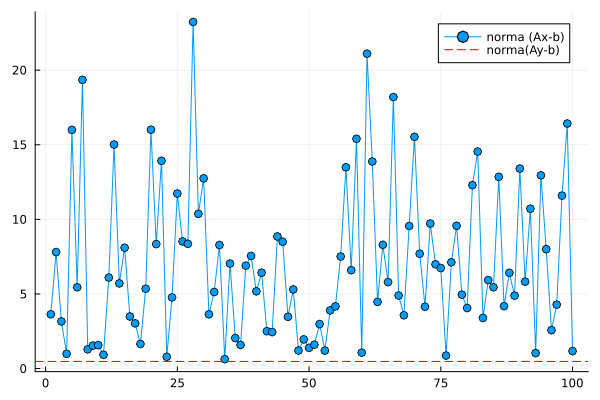

In [ ]:
using Random, Plots

# Parámetros
num_samples = 100  # Número de muestras aleatorias


# Cálculo del error para muchas x aleatorias
errores = Float64[]
for _ in 1:num_samples
    x = randn(2)  # x aleatorio en R^n
    push!(errores, norm(A * x - b))  # Error de la norma
end
#plot(errores)
p=plot(errores, marker=:o, label="norma (Ax-b)")#, linewidth=2)
# Comparar con la norma de la proyección de b
#error_proyeccion = norm(b - b_proj)
y=A\b #solución por mínimos
min=norm(A*y-b)
# Graficar los resultados

#title!("Comparación del error ||Ax - b|| con proyección")
#xlabel!("Norma del error")
#ylabel!("Frecuencia")
hline!([min], linewidth=1, linestyle=:dash, color=:red, label="norma(Ay-b)")

In [ ]:
#Comparemos errores
minimum(errores)

0.6328386722219786

In [ ]:
norm(A*y-b)

0.4796437805095313

## Dependencia Lineal y Rango de una Matriz
El rango de una matriz es el número de columnas independientes. Si una columna es combinación lineal de otras, no contribuye a la dimensión del espacio.
Consideremos por ejemplo:
$$\mathbf{A} = \begin{bmatrix} 1 & 4 & 5 \\ 2 & 5 & 7 \\ 3 & 6 & 9 \end{bmatrix}$$



Observar que la última columna de $A_2$ es la suma de las primeras dos.

In [ ]:
A = reshape([1,2,3,4,5,6,5,7,9],3,3)
display(A)

3×3 Matrix{Int64}:
 1  4  5
 2  5  7
 3  6  9

In [ ]:
A*[1,1,-1]

3-element Vector{Int64}:
 0
 0
 0

In [ ]:
rank_A = rank(A)
println("Rango de A:", rank_A)

Rango de A:2


## Descomposición en Matrices $C$ y $R$ (columnas y filas)

Descomponemos la matriz $A$ como producto de una matriz $C$ que contiene las columnas linealmente independientes, y una matriz de  $R$, de modo que:
$$\mathbf{A} = \mathbf{C} \mathbf{R}$$


En nuestro caso podemos consdierar la matriz C como las dos primeras columnas:
$$
(*)\quad\underbrace{\begin{pmatrix} 1 & 4 & 5 \\ 2 & 5 & 7 \\ 3 & 6 & 9 \end{pmatrix}}_{A}
=
\underbrace{\begin{pmatrix}
1&4\\2&5\\3&6
\end{pmatrix}}_{C}⋅
\underbrace{\begin{pmatrix}
1&0&1\\0&1&1
\end{pmatrix}}_R
$$
Observar que si la matriz $A$ es $n\times n$, y de rango $r$ entonces en esta descomposición $C$ es de tamaño $n\times r$ y $R$ de tamaño $r\times n$:
$$
\underbrace{A}_{n\times n}=\underbrace{C}_{n\times r}\cdot \underbrace{R}_{r\times n}
$$

También es importante notar que la descomposición no es única, dado que podemos elegir de formas distintas las columnas que forman una base del espacio columnas.

In [ ]:
C=reshape([1,2,3,4,5,6],3,2)

3×2 Matrix{Int64}:
 1  4
 2  5
 3  6

In [ ]:
R=[1 0 1;0 1 1]

2×3 Matrix{Int64}:
 1  0  1
 0  1  1

In [ ]:
A==C*R

true

Otro ejemplo sencillo es:
$$
\begin{pmatrix}
1&2&3&4\\
1&2&3&4\\
1&2&3&4\\
1&2&3&4
\end{pmatrix}=
\begin{pmatrix}1\\1\\1\\1\end{pmatrix}\cdot
\begin{pmatrix}1&2&3&4\end{pmatrix}
$$
Observar que si conocemos que nuestra matriz tiene rango bajo $r\ll n$, entonces en vez de tener $n^2$ coeficientes, nuestra matriz puede ser codificada en $2n\cdot r$ coeficientes que es mucho más chico que $n^2$.

Realicemos algunas consideraciones.
- La matriz $C$ tiene forman una base del espacio columnas de $A$
- Un hecho muy interesante es que la matriz $R$ resulta ser una base del espacio de filas de $A$. Este hecho es un resultado importante: \\
 **``la dimensión del espacio columna coincide con la dimensión del espacio fila''**

 Veamos esto para el caso de nuestra matriz $A$. La prueba se extiende fácilmente para el caso general.

 Observar que las filas de $R$ son independientes, dado que el primer bloque es la identidad, i.e., $R$ en nuestro caso es de la forma
 $$
R=\begin{pmatrix}
Id_2 & v
\end{pmatrix}
 $$
 con $v=\binom11$. Lo que faltaría ver que son una base del espacio filas de $A$.

 Veamos que las filas de $A$ se pueden escribir como combinación lineal de las filas de $R$.

De $(*)$ tenemos que las filas de $A$ son combinaciones lineales de las filas de $R$:

 $$
(1,4,5)=1(1,0,1)+4(0,1,1)\\
(2,5,6)=2(1,0,1)+5(0,1,1)\\
(3,6,9)=3(1,0,1)+6(0,1,1)
 $$

 Por lo tanto las filas de $R$ general las filas de $A$. Ya está? o falta algo? tenemos que las filas de $R$ son independientes y cualquier fila de $A$ es combinación lineal de las filas de $R$. Entonces deberían ser una base,no?



 Faltaría ver que los vectores filas están en el espacio columnas! Eso es lo que entendemos por un "generador" de un subespacio.

 (Observar que la base canónica genera cualquier vector en un subespacio fijo, y obviamente son independientes, pero eso no implica que la base canónica es un generador  dicho subsepacio.)

**Ejercicio:** Pruebe que las filas de $R$ están en el espacio fila de $A$.


 <details>
 <summary><b>Apriete aquí para ver la respuesta</b></summary>

 Por qué las filas de $R$ están en el espacio filas $R(A)$ de $A$?

$$
\begin{pmatrix} 1 & 4 & 5 \\ 2 & 5 & 7
\end{pmatrix}
=
\begin{pmatrix}
1&4\\2&5
\end{pmatrix}\cdot
\begin{pmatrix}
1&0&1\\0&1&1
\end{pmatrix}
$$
Luego como el menor $2x2$ (la primer matriz) es invertible podemos multiplicar a izquierda y obtener
$$
\begin{pmatrix}
a&c\\b&d
\end{pmatrix}\cdot \begin{pmatrix} 1 & 4 & 5 \\ 2 & 5 & 7
\end{pmatrix}=
\begin{pmatrix}
1&0&1\\0&1&1
\end{pmatrix}  
$$
siendo la primer matriz la inversa del menor considerado.

Acá es importane que el menor $2\times 2$ que hemos tomado sea invertible.

Recordar que la inversa de una matriz 2x2 viene dada por la fórmula:
$$
\begin{pmatrix}
\alpha &\gamma\\\beta&\delta
\end{pmatrix}^{-1}=
\frac{1}{\alpha\delta-\beta\gamma}
\begin{pmatrix}
\delta&-\beta\\-\gamma&\alpha
\end{pmatrix}
$$

 </details>




**$(\dagger)$ Ejercicio:** Argumentar para el caso general. Es decir, dar una prueba de que en la descomposición $A=CR$ (en general), se tiene que las filas de $R$ son una base del espacio filas.

$(\dagger)$**Ejercicio:** Encontrar la matriz $2\times 2$ tal que

$(\dagger)$ **Ejercicio:** Argumentar porqué siempre podemos descomponer una matriz $A$ de rango $r$ de la forma
$$
A=C \Delta R,
$$
con
- $C$ una matriz $n\times r$ que es base del espacios columnas,
- $\Delta$ matriz $r\times r$ invertible,
- $R$  matriz $r\times n$ que es una base del espacio filas de $A$.

# Multiplicación de Matrices AB

## Inner products

Las **inner products** (filas por columnas) producen cada uno de los números en \( AB = C \):

$$
\text{fila 2 de } A \quad \cdot \quad \text{columna 3 de } B \quad \Rightarrow \quad \text{da } c_{23} \text{ en } C
$$

$$
\begin{bmatrix}
a_{21} & a_{22} & a_{23}
\end{bmatrix}
\cdot
\begin{bmatrix}
b_{13} \\ b_{23} \\ b_{33}
\end{bmatrix}
=
c_{23}
$$

Ese producto puntual se calcula como:

$$
c_{23} = (\text{fila 2 de } A) \cdot (\text{columna 3 de } B) = \sum a's \cdot b's
$$

$$
c_{23} = a_{21} b_{13} + a_{22} b_{23} + a_{23} b_{33} = \sum a_{2k} b_{k3}, \quad \text{donde} \quad c_{ij} = \sum a_{ik} b_{kj}
$$

Este es el método usual para computar cada número en $AB = C$. Sin embargo, hay otro enfoque.

## Outer product

Otra forma de multiplicar matrices es como suma de productos exteriores de **columnas** de $A$ y **filas** de $B$. Para ver esto, comencemos con un caso especial:

$$
\text{"Outer product"} \quad = \quad uv^T
$$

Ejemplo:

$$
\begin{bmatrix} 2 \\ 1 \end{bmatrix}
\begin{bmatrix} 3 & 4 & 6 \end{bmatrix}
=
\begin{bmatrix} 6 & 8 & 12 \\ 3 & 4 & 6 \end{bmatrix}
$$

Este producto genera una matriz de rango uno. De manera general, un producto exterior $uv^T$ produce una matriz de rango uno, ya que todas sus columnas son múltiplos de $u$ y todas sus filas son múltiplos de $v^T$.

La dimensión del espacio generado por $uv^T$ es de una dimensión: **la línea en la dirección de $u$**. Así, toda matriz de rango uno tiene un espacio columna de dimensión uno.

### Transposición y el producto exterior

$$
(uv^T)^T =
\begin{bmatrix} 6 & 8 & 12 \\ 3 & 4 & 6 \end{bmatrix}^T
=
\begin{bmatrix} 6 & 3 \\ 8 & 4 \\ 12 & 6 \end{bmatrix}
$$

Podemos escribir:

$$
(uv^T)^T = vu^T
$$


# Flashes del Álgebra Lineal

## Teorema del Rango (teorema de las dimensiones)

Estamos viendo el ejemplo más claro del primer gran teorema del álgebra lineal:

**Rango por columnas= rango por filas**

$r$ columnas independientes $\Leftrightarrow r$ filas independendientes


 <details>
 <summary><b>
*$(\dagger)$ Cómo se relaciona con el teorema de las dimensiones?*</b></summary>
Nuestra matriz $A$ de tamaño $m\times n$, se puede pensar como una transformación lineal
$$
A:\mathbb{R}^n\ to \mathbb{R}^m.
$$
Observar que la matriz traspuesta $A^T$ satisface $$\langle Av,w\rangle =\langle v,A^Tw\rangle\qquad v\in\R^{n}, w\in\mathbb{R}^m.
$$
De esta igualdad resulta que el núcleo de $A^T$ es ortogonal a la imagen de $A$ (*verificar eso*).
Luego tenemos que el núcleo de $A$ y la imagen de $A^T$ dan una descomposición ortogonal del dominio $\R^n$. Es decir:
$$
n=\dim (\ker(A)) + \dim Im(A^T).
$$
Luego como el rango por filas es igual al rango por columnas resulta que $\dim Im(A^T)=\dim(Im(A))$. Lo cual implica el teorema de las dimensiones.
 </details>

---

Una matriz no nula $uv^T$ tiene exactamente **una columna independiente y una fila independiente**. Todas sus columnas son múltiplos de $u$ y todas sus filas son múltiplos de $v^T$. El rango es $r = 1$ para esta matriz.

---

## $AB = $ Suma de Matrices de Rango Uno

Ahora consideramos el producto completo $AB$, usando columnas de $A$ multiplicadas por filas de $B$. Sean $a_1, a_2, \dots, a_n$ las columnas de $A$. Entonces, $B$ debe tener $n$ filas $b_1^T, b_2^T, \dots, b_n^T$. La matriz $A$ multiplica a la matriz $B$. Su producto $AB$ es la suma de **columnas de $A$ multiplicadas por filas de $B$**:

### Column-row multiplication of matrices

$$
AB =
\begin{bmatrix}
a_1 & a_2 & \dots & a_n
\end{bmatrix}
\begin{bmatrix}
b_1^T \\ b_2^T \\ \vdots \\ b_n^T
\end{bmatrix}
=
a_1 b_1^T + a_2 b_2^T + \dots + a_n b_n^T
$$

(suma de matrices de rango uno)

Un ejemplo con una matriz $2 \times 2$ para ilustrar la suma de $n = 2$ piezas:

$$
AB =
\begin{bmatrix} 1 \\ 3 \end{bmatrix}
\begin{bmatrix} 2 & 4 \end{bmatrix}
+
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\begin{bmatrix} 0 & 5 \end{bmatrix}
=
\begin{bmatrix} 2 & 4 \\ 6 & 12 \end{bmatrix}
+
\begin{bmatrix} 0 & 0 \\ 0 & 5 \end{bmatrix}
=
\begin{bmatrix} 2 & 4 \\ 6 & 17 \end{bmatrix}
$$

---

Podemos contar las multiplicaciones de números en los productos. Cuatro multiplicaciones para obtener $2, 4, 6, 12$. Otras cuatro para obtener $0, 0, 0, 5$.  
El total de $2 \times 2 = 8$ multiplicaciones.  
Siempre hay $m \times n \times p$ multiplicaciones cuando $A$ es $m \times n$ y $B$ es $n \times p$.  
La multiplicación de matrices se puede ver como la suma de $n$ matrices de **rango uno**, cada una de ellas de tamaño $m \times p$.

El conteo es el mismo para el método de productos internos usual. La fila $i$ de $A$ con la columna $j$ de $B$ da $mp$ productos internos. Hacer esto para cada una de las $n$ columnas de $A$ es nuevamente **$mnp$**.  
La cuenta total es otra vez **$mnp$** cuando multiplicamos $(m \times n)$ por $(n \times p)$.

- Columnas $\times$ filas $\quad \Rightarrow \quad$ **inner products**, $mnp$
- Columnas $\times$ filas $\quad \Rightarrow \quad$ **outer products**, $mnp$
- Multiplicaciones de cada fila $\times$ cada columna $\quad \Rightarrow \quad$ **mnp**

Cuando observamos más de cerca, **vemos exactamente las mismas multiplicaciones $a_{ik} b_{kj}$ en diferentes órdenes**. Aquí está la prueba algebraica de que cada número $c_{ij}$ en $C = AB$ es la misma suma de productos exteriores en $(3)$ y productos internos en $(2)$:

El $(i, j)$-ésimo término de $AB$, es:

$$
c_{ij} = a_{i1} b_{1j} + a_{i2} b_{2j} + \dots + a_{in} b_{nj} = \sum a_{ik} b_{kj}
$$

(fila $i$ $\cdot$ columna $j$)



# Insight from Column times Row

¿Por qué el enfoque del producto exterior es esencial en ciencia de datos?  
La respuesta corta es: **estamos buscando la parte más importante de una matriz**.  

No siempre necesitamos todas las entradas de una matriz $A$, pero sí nos interesa su mayor parte en términos de información. **Esos elementos clave son las matrices de rango uno $uv^T$**. Un tema dominante en álgebra lineal aplicada es:

**Factoriza $A$ en $CR$ y observa las piezas $c_k r_k^T$ en $A = CR$.**

Factorizar $A$ en $CR$ es lo opuesto a multiplicar $CR = A$. Factorizar suele ser más largo, especialmente si el objetivo involucra **autovalores** o **valores singulares**.  
Pero estas factorizaciones revelan información oculta sobre la matriz $A$, que **no es visible solo al multiplicar**.

A continuación, las factorizaciones más importantes con la elección estándar de centros (usualmente $A$) para la matriz original y las formas que toman sus factores:

$$
A = LU \quad A = QR \quad S = Q \Lambda Q^T \quad A = X \Lambda X^{-1} \quad A = U \Sigma V^T
$$

### Propiedades clave de estas factorizaciones:

1. **$A = LU$** proviene de la **eliminación**.  
   - Combinaciones de filas llevan $A$ a $L U$ y viceversa.  
   - $L$ es **triangular inferior** y $U$ es **triangular superior** en la ecuación (4).

2. **$A = QR$** proviene de **ortogonalizar** las columnas de $Q$, como en "Gram-Schmidt".  
   - $Q$ tiene **columnas ortogonales** ($Q^T Q = I$) y $R$ es **triangular superior**.

3. **$S = Q \Lambda Q^T$** proviene de los **autovalores $\lambda_1, \dots, \lambda_n$** de la **matriz simétrica** $S = S^T$.  
   - **Autovalores en la diagonal de $\Lambda$.**  
   - **Autovectores en las columnas de $Q$.**

4. **$A = X \Lambda X^{-1}$** es la **diagonalización** cuando $A$ tiene $n$ **autovectores independientes**.  
   - **Autovalores en la diagonal de $\Lambda$.**  
   - **Autovectores en las columnas de $X$.**

5. **$A = U \Sigma V^T$** es la **Singular Value Decomposition (SVD)** para cualquier matriz $A$ (cuadrada o no).  
   - **Valores singulares $\sigma_1, \dots, \sigma_r$ en $\Sigma$.**  
   - **Matriz ortogonal de valores singulares en $U$ y $V^T$.**

---

### Simetría y Matrices Ortogonales

Tomemos una matriz de tamaño **dos** para ilustrar la idea. La factorización especial $Q \Lambda Q^T$ inicia con una **matriz simétrica** $S$.  
Esa matriz tiene **autovalores reales** y **autovectores ortogonales** $q_1, q_2, \dots$.  
Esos autovectores diagonalizan $S$ y definen las **propiedades clave de matrices simétricas y ortogonales**:

#### Matriz Simétrica $S = S^T$

- Todos $a_{ij} = a_{ji}$

#### Matriz Ortogonal $Q$

- $Q^T Q = Q Q^T = I$
- Todas las $q_i$ son ortonormales:

$$
q_i \cdot q_j =
\begin{cases}
1, & \text{si } i = j \\
0, & \text{si } i \neq j
\end{cases}
$$


# Eigenvector $q$ and Eigenvalue $\lambda$

La matriz diagonal $\Lambda$ contiene autovalores $\lambda_1, \lambda_2, \dots, \lambda_n$.  
Toda **matriz simétrica** $S$ tiene una **base ortonormal de autovectores** $q_1, q_2, \dots, q_n$.  
Cuando multiplicamos $S$ por $q_i$, los autovectores permanecen en la misma dirección, solo escalados por $\lambda_i$:

$$
S q = \lambda q
$$

(5)

---

Encontrar $\lambda$ y $q$ **no es fácil** en matrices grandes.  
Pero los pares $(\lambda, q)$ **siempre existen** cuando $S$ es **simétrica**.  
Nuestra prueba aquí es ver cómo $SQ = Q \Lambda$ se obtiene únicamente con **multiplicación de matrices**:

$$
SQ =
S \begin{bmatrix} q_1 & q_2 & \dots & q_n \end{bmatrix}
=
\begin{bmatrix} S q_1 & S q_2 & \dots & S q_n \end{bmatrix}
=
\begin{bmatrix} \lambda_1 q_1 & \lambda_2 q_2 & \dots & \lambda_n q_n \end{bmatrix}
=
Q \Lambda.
$$

Multiplicando por $Q^{-1}$ a la derecha:

$$
SQ Q^{-1} = Q \Lambda Q^T
$$

Obtenemos **$S = Q \Lambda Q^T$**, una matriz **simétrica**.  

Cada autovalor $\lambda_i$ y su autovector $q_i$ contribuyen con una **matriz de rango uno**:

$$
\lambda_i q_i q_i^T.
$$

---

### Rank one pieces

$$
S = (Q \Lambda Q^T) = (\lambda_1 q_1 q_1^T + \lambda_2 q_2 q_2^T + \dots + \lambda_n q_n q_n^T).
$$

(Todas son **matrices simétricas**.)

La transposición de $q_i q_i^T$ es:

$$
q_i q_i^T = q_i q_i^T.
$$

(8)

---

**Observación:**  
Las columnas de $Q \Lambda$ son simplemente $\lambda_i q_i, \lambda_2 q_2, \dots$.  
Multiplicar una matriz a la **derecha** por $\Lambda$ **multiplica sus columnas por los autovalores $\lambda_i$**.

---

## Comentario sobre el **Teorema Espectral**

**Teorema Espectral**:  
$$
S = Q \Lambda Q^T.
$$
Toda **matriz simétrica** $S$ tiene **autovalores reales** y **autovectores ortonormales**.  

La sección 1.6 construirá los autovalores como las raíces del polinomio característico $\det(S - \lambda I)$.  
Son **números reales** porque **$S = S^T$**.  

Un detalle delicado en la prueba ocurre cuando **un autovalor es repetido**.  
Si $\lambda$ es una raíz doble de $\det(S - \lambda I)$,  
necesitamos encontrar **$M$ autovectores independientes** asociados a $\lambda$, donde $M$ es la **multiplicidad de $\lambda$** en $\det(S - \lambda I)$.

---

### Singular Value Decomposition

De manera similar, la **Descomposición en Valores Singulares (SVD)**

$$
A = U \Sigma V^T
$$

requiere un **par ortonormal** cuando un **valor singular** $\sigma$ se repite **$M$ veces en la matriz diagonal $\Sigma$**.  
En este caso, encontramos **$M$ autovectores ortogonales**.

---

### Notación de Filas y Transposición

La notación para las **filas de $B$** ha sido **$b_1^T, b_2^T, \dots$**, pero esta notación puede ser confusa.  
Podríamos haber esperado **$b_1, b_2$**, pero **eso fue un descuido**.  

Para evitar confusión, es mejor decir con precisión:

> **"Queremos las filas de esa matriz."**
